In [39]:
import LowLevelFEM as FEM
using LowLevelFEM

gmsh.initialize()

In [40]:
using Plots

In [41]:
gmsh.open("transient3D.geo")

Info    : Reading 'transient3D.geo'...
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 60%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.00137877s, CPU 0.001331s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : [ 40%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [ 60%] Meshing surface 4 (Plane, Frontal-Delaunay)
Info    : [ 70%] Meshing surface 5 (Plane, Frontal-Delaunay)
Info    : [ 90%] Meshing surface 6 (Plane, Frontal-Delaunay)
Info

In [42]:
#gmsh.fltk.run()

In [43]:
body = FEM.material("body")
problem = FEM.Problem([body], type="HeatConduction")

Info    : RCMK renumbering...
Info    : Done RCMK renumbering (bandwidth is now 89)


LowLevelFEM.Problem("transient3D", "HeatConduction", 3, 1, LowLevelFEM.Material[LowLevelFEM.Material("body", 200000.0, 0.3, 7.85e-9, 45.0, 4.2e8, 1.2e-5)], 1.0, 726)

In [44]:
K = FEM.heatConductionMatrix(problem)

726×726 SparseArrays.SparseMatrixCSC{Float64, Int64} with 8052 stored entries:
⎡⣿⢟⡀⠘⠀⠈⠀⠃⠀⠾⣼⠀⠆⠀⠂⠀⡇⠀⡄⠀⠄⢨⡇⢠⠀⠠⠀⣸⠀⡂⠀⠂⠀⣛⠀⠀⠀⠀⠀⠀⎤
⎢⣀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠰⣛⢼⢿⢄⠀⡁⠀⠀⠀⠀⠀⡞⡪⢞⡏⠀⢈⡀⠀⢀⡀⠀⡀⠀⠀⠰⡝⣨⠂⎥
⎢⡀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠠⠞⠷⠭⠋⠘⣄⡀⣀⢀⠀⢀⣀⣀⠀⣀⠀⢐⠧⠿⠩⠎⠀⣇⠀⠀⠠⢊⡊⡻⎥
⎢⠤⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠰⣭⡞⡟⡀⠠⠜⠷⠾⠚⠁⠡⣠⣠⣀⡀⠀⠄⠀⠀⠐⢂⡙⡠⎥
⎢⣠⡄⠀⠀⠀⠀⠀⠈⠻⣦⠀⠀⡄⠀⡄⠀⡸⠚⡜⠗⡅⢨⡄⢀⠀⢠⠀⢠⠺⡧⠋⡎⠀⣠⢠⢠⡄⠋⠻⠏⎥
⎢⠒⠛⣴⢢⣠⠆⠀⠀⠀⠀⠛⢄⢱⣶⣶⣶⡃⠀⠁⠀⠀⠘⣣⠼⣦⢆⠀⢓⡦⣡⢠⢀⠀⡛⣸⢾⡳⣆⣴⣴⎥
⎢⠈⠁⣶⣗⡝⡇⠀⠀⠀⠉⢱⣶⣟⢝⢿⣿⠁⠀⠀⠀⠀⠀⢗⡔⣥⡗⠀⠐⡇⠛⣕⡃⠀⠒⡟⣽⢺⣾⢓⣯⎥
⎢⠈⠀⠀⠑⣋⠀⠀⠀⠀⠉⢸⣿⣿⣷⣿⣿⠃⠀⠀⠀⠀⠀⠁⠀⠀⠁⠀⠈⠁⠈⠘⠉⠀⣸⡾⣿⣷⣿⢿⣽⎥
⎢⠉⠉⠁⠈⠀⠹⡔⣦⣲⠊⠉⠈⠁⠀⠉⠀⠑⢄⣶⣶⣶⣶⠴⡶⠒⠲⡀⠬⢤⡰⣒⣀⠀⢉⡬⣮⢿⣲⣴⡖⎥
⎢⠀⠉⠀⠀⠀⢘⣾⠭⢶⠍⠁⠀⠀⠀⠀⠀⢸⣿⣕⢝⣿⣟⢍⡯⠔⣑⠄⡄⡸⠎⡦⡑⠀⢀⣞⡾⣫⡶⣣⡷⎥
⎢⡀⣁⠀⠀⠀⢀⠀⡈⡁⣉⣀⠀⠀⠀⠀⠀⢸⣿⣿⢿⣿⣿⣁⢀⠀⠀⠀⠀⢁⠀⡉⠀⠀⣸⣷⣯⡿⣷⡿⣷⎥
⎢⠉⣉⡺⡩⠀⢸⢶⡅⠀⢉⣉⡞⢙⠵⠁⠀⢰⡧⡧⡵⠁⢘⢛⣴⢿⣷⣿⣿⠈⠀⠀⠀⠀⢸⣼⣯⣿⡷⡲⠋⎥
⎢⠀⡀⡾⠵⠀⢠⣺⠃⠀⣀⠨⢟⢥⠿⠄⠀⢸⡀⢔⢡⠀⠀⢿⣷⣟⣽⢿⣇⠀⠀⠀⠀⠀⢠⣓⢿⡯⣿⣺⡟⎥
⎢⣀⣠⡀⢀⢀⢀⠅⡀⠀⣀⢤⢀⢀⠀⡀⠀⡀⡌⠀⠥⠀⠀⣿⣿⠿⢷⡿⣯⠀⢀⠀⡀⣀⢘⢯⢿⡿⡷⠻⡜⎥
⎢⠠⠠⠀⠈⣭⡇⠀⣺⠾⡦⠌⣫⣭⠉⡁⠀⢀⡳⡲⠎⠁⠐⠂⠀⠀⠀⠀⢀⣑⣼⢿⣿⣿⣷⣽⣿⣾⡿⣟⣿⎥
⎢⠠⠀⠀⠰⡣⠆⠀⠸⡫⠤⠀⢒⠵⠹⡖⠀⠘⢸⢌⠫⠃⠈⠀⠀⠀⠀⠀⠠⣿⣷⣕⣽⣿⣥⣓⢯⢴⠙⣾⣿⎥
⎢⣤⢠⠀⠠⠤⢤⠀⠄⠀⣠⣤⠠⢠⠀⣀⣠⡄⢀⠀⢀⣀⣠⣀⣀⠀⣀⣀⢘⢿⣿⠟⣿⣿⣿⢿⣻⣴⡿⣿⣻⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⣒⣲⣞⣟⣭⣾⣯⡢⣯⣺⡽⡽⣿⡶⣿⣽⣜⣯⣗⣷⣿⡽⣜⣿⣳⣿⣿⣿⣿⣿⣿⎥
⎢⠀⠀⣔⠦⡠⢂⠰⢀⡤⠉⠹⢮⣺⣶⣽⣿⢻⣳⢫⡾⢿⣯⢿⡿⣯⣯⢿⡯⣾⡿⣔⠓⣴⡿⣿⣿⢿⢗⣿⣿⎥
⎣⠀⠀⠢⠚⣮⡨⠓⡨⡿⠆⢐⣿⡽⣴⣟⣷⢰⠿⢭⡾⢿⣯⡼⠊⣾⠾⣛⠦⣿⣽⣾⣿⣿⣻⣿⣿⣿⣿⣿⣿⎦

In [45]:
C = FEM.heatCapacityMatrix(problem, lumped=false)

726×726 SparseArrays.SparseMatrixCSC{Float64, Int64} with 8052 stored entries:
⎡⣿⢟⡀⠘⠀⠈⠀⠃⠀⠾⣼⠀⠆⠀⠂⠀⡇⠀⡄⠀⠄⢨⡇⢠⠀⠠⠀⣸⠀⡂⠀⠂⠀⣛⠀⠀⠀⠀⠀⠀⎤
⎢⣀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠰⣛⢼⢿⢄⠀⡁⠀⠀⠀⠀⠀⡞⡪⢞⡏⠀⢈⡀⠀⢀⡀⠀⡀⠀⠀⠰⡝⣨⠂⎥
⎢⡀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠠⠞⠷⠭⠋⠘⣄⡀⣀⢀⠀⢀⣀⣀⠀⣀⠀⢐⠧⠿⠩⠎⠀⣇⠀⠀⠠⢊⡊⡻⎥
⎢⠤⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠰⣭⡞⡟⡀⠠⠜⠷⠾⠚⠁⠡⣠⣠⣀⡀⠀⠄⠀⠀⠐⢂⡙⡠⎥
⎢⣠⡄⠀⠀⠀⠀⠀⠈⠻⣦⠀⠀⡄⠀⡄⠀⡸⠚⡜⠗⡅⢨⡄⢀⠀⢠⠀⢠⠺⡧⠋⡎⠀⣠⢠⢠⡄⠋⠻⠏⎥
⎢⠒⠛⣴⢢⣠⠆⠀⠀⠀⠀⠛⢄⢱⣶⣶⣶⡃⠀⠁⠀⠀⠘⣣⠼⣦⢆⠀⢓⡦⣡⢠⢀⠀⡛⣸⢾⡳⣆⣴⣴⎥
⎢⠈⠁⣶⣗⡝⡇⠀⠀⠀⠉⢱⣶⣟⢝⢿⣿⠁⠀⠀⠀⠀⠀⢗⡔⣥⡗⠀⠐⡇⠛⣕⡃⠀⠒⡟⣽⢺⣾⢓⣯⎥
⎢⠈⠀⠀⠑⣋⠀⠀⠀⠀⠉⢸⣿⣿⣷⣿⣿⠃⠀⠀⠀⠀⠀⠁⠀⠀⠁⠀⠈⠁⠈⠘⠉⠀⣸⡾⣿⣷⣿⢿⣽⎥
⎢⠉⠉⠁⠈⠀⠹⡔⣦⣲⠊⠉⠈⠁⠀⠉⠀⠑⢄⣶⣶⣶⣶⠴⡶⠒⠲⡀⠬⢤⡰⣒⣀⠀⢉⡬⣮⢿⣲⣴⡖⎥
⎢⠀⠉⠀⠀⠀⢘⣾⠭⢶⠍⠁⠀⠀⠀⠀⠀⢸⣿⣕⢝⣿⣟⢍⡯⠔⣑⠄⡄⡸⠎⡦⡑⠀⢀⣞⡾⣫⡶⣣⡷⎥
⎢⡀⣁⠀⠀⠀⢀⠀⡈⡁⣉⣀⠀⠀⠀⠀⠀⢸⣿⣿⢿⣿⣿⣁⢀⠀⠀⠀⠀⢁⠀⡉⠀⠀⣸⣷⣯⡿⣷⡿⣷⎥
⎢⠉⣉⡺⡩⠀⢸⢶⡅⠀⢉⣉⡞⢙⠵⠁⠀⢰⡧⡧⡵⠁⢘⢛⣴⢿⣷⣿⣿⠈⠀⠀⠀⠀⢸⣼⣯⣿⡷⡲⠋⎥
⎢⠀⡀⡾⠵⠀⢠⣺⠃⠀⣀⠨⢟⢥⠿⠄⠀⢸⡀⢔⢡⠀⠀⢿⣷⣟⣽⢿⣇⠀⠀⠀⠀⠀⢠⣓⢿⡯⣿⣺⡟⎥
⎢⣀⣠⡀⢀⢀⢀⠅⡀⠀⣀⢤⢀⢀⠀⡀⠀⡀⡌⠀⠥⠀⠀⣿⣿⠿⢷⡿⣯⠀⢀⠀⡀⣀⢘⢯⢿⡿⡷⠻⡜⎥
⎢⠠⠠⠀⠈⣭⡇⠀⣺⠾⡦⠌⣫⣭⠉⡁⠀⢀⡳⡲⠎⠁⠐⠂⠀⠀⠀⠀⢀⣑⣼⢿⣿⣿⣷⣽⣿⣾⡿⣟⣿⎥
⎢⠠⠀⠀⠰⡣⠆⠀⠸⡫⠤⠀⢒⠵⠹⡖⠀⠘⢸⢌⠫⠃⠈⠀⠀⠀⠀⠀⠠⣿⣷⣕⣽⣿⣥⣓⢯⢴⠙⣾⣿⎥
⎢⣤⢠⠀⠠⠤⢤⠀⠄⠀⣠⣤⠠⢠⠀⣀⣠⡄⢀⠀⢀⣀⣠⣀⣀⠀⣀⣀⢘⢿⣿⠟⣿⣿⣿⢿⣻⣴⡿⣿⣻⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⣒⣲⣞⣟⣭⣾⣯⡢⣯⣺⡽⡽⣿⡶⣿⣽⣜⣯⣗⣷⣿⡽⣜⣿⣳⣿⣿⣿⣿⣿⣿⎥
⎢⠀⠀⣔⠦⡠⢂⠰⢀⡤⠉⠹⢮⣺⣶⣽⣿⢻⣳⢫⡾⢿⣯⢿⡿⣯⣯⢿⡯⣾⡿⣔⠓⣴⡿⣿⣿⢿⢗⣿⣿⎥
⎣⠀⠀⠢⠚⣮⡨⠓⡨⡿⠆⢐⣿⡽⣴⣟⣷⢰⠿⢭⡾⢿⣯⡼⠊⣾⠾⣛⠦⣿⣽⣾⣿⣿⣻⣿⣿⣿⣿⣿⣿⎦

In [46]:
left = FEM.temperatureConstraint("left", T=0)
right = FEM.temperatureConstraint("right", T=100)
hf = FEM.heatFlux("left", qn=0)

("left", 0, 0, 0)

In [47]:
q0 = zeros(problem.non)

726-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [48]:
FEM.applyBoundaryConditions!(problem, K, C, q0, [left, right])

In [49]:
T0 = FEM.initialTemperature(problem, "right", T=100)

726-element Vector{Float64}:
   0.0
   0.0
   0.0
   0.0
 100.0
 100.0
 100.0
 100.0
   0.0
   0.0
   ⋮
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0

In [50]:
λₘᵢₙ = FEM.smallestEigenValue(K, C)

0.013482257500489757

In [51]:
λₘₐₓ = FEM.largestEigenValue(K, C)

92.67769212160222

In [52]:
ϑ = 0.4
Δt = 2 / ((1 - 2ϑ) * λₘₐₓ)
ϑ = 0.5
display("Δt=$Δt")

"Δt=0.10790083105305452"

In [53]:
#T, t = FEM.FDM(K, C, q0, T0, 1000 * Δt, Δt, ϑ=0.5)
T, t = FEM.FDM(K, C, q0, T0, 10, 0.01, ϑ=0.66)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 -0.0002527380087643924 … 33.206209168085316 33.23029588974396; 0.0 -1.316481334499097e-16 … 0.041822981882081806 0.04212357600442542], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09  …  9.899999999999833, 9.909999999999833, 9.919999999999833, 9.929999999999833, 9.939999999999833, 9.949999999999832, 9.959999999999832, 9.969999999999832, 9.979999999999832, 9.989999999999831])

In [54]:
T1 = FEM.showDoFResults(problem, T, "T", t=t, visible=true);

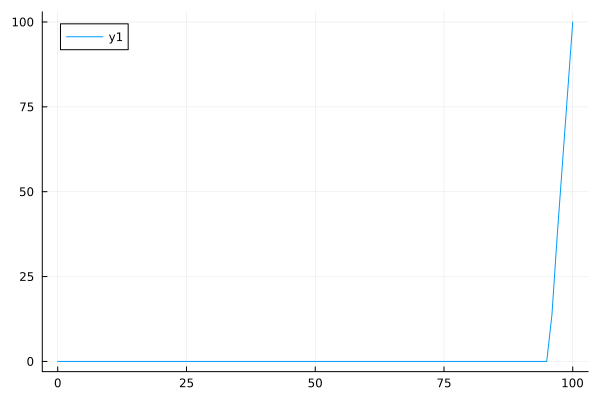

In [55]:
p1, xy = FEM.plotOnPath(problem, "path", T1, plot=true)
plot(xy)

In [56]:
gmsh.fltk.run()

-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 19700101
Build host    : amdci7.julia.csail.mit.edu
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack LinuxJoystick MathEx[contrib] Mesh Metis[contrib] Mmg Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.8
OCC version   : 7.7.2
Packaged by   : root
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


XRequest.18: BadValue 0x0


In [57]:
gmsh.finalize()